In [18]:
#class Perceptron(object):
#    def __init__(self, eta=0.01, n_iter=50, random_state=1):
#        self.eta = eta
#        self.n_iter = n_iter
#        self.random_state = random_state
        
#    def fit(self, X, y):
#        rgen = np.random.RandomState(random_state)
#        self.w_ = rgen.normal(loc=0.0, scale=0.01, size=1+X.shape[1])
#        self.errors = []
        
#        for _ in range(self.n_iter):
#            errors = 0
#            for xi, target in zip(X, y):
#                update = self.eta * (target - self.predict(xi))
#                self.w_[1:] += update * xi
#                self.w_[0] += update
#                errors += int(update != 0.0)
#            self.errors_.append(errors)
#        return self
    
#    def net_input(self, X):
#        return np.dot(self.w_[1:], X) + self.w_[0]
    
#    def predict(self, X):
#        return np.where(self.net_input(X) > 0.0, 1, -1)

In [6]:
from sklearn import datasets
import numpy as np
# Iris データセットをロード
iris = datasets.load_iris()
# 3,4 列目の特徴量を抽出
X = iris.data[: , [2, 3]]
# クラスラベルを取得
y = iris.target
print('Class labels: ', np.unique(y))

Class labels:  [0 1 2]


In [22]:
from sklearn.model_selection import train_test_split
# 訓練データとテストデータに分割
# 全体の３０％をテストデータにする
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1, stratify=y)
X_train2, X_test2, y_train2, y_test2 = train_test_split(X, y, test_size=0.3, random_state=1)

In [23]:
print('Label counts in y: ', np.bincount(y))
print('Label counts in y_train: ', np.bincount(y_train))
print('Label counts in y_test: ', np.bincount(y_test))
print('Label counts in y_train2: ', np.bincount(y_train2))
print('Label counts in y_test2: ', np.bincount(y_test2))

Label counts in y:  [50 50 50]
Label counts in y_train:  [35 35 35]
Label counts in y_test:  [15 15 15]
Label counts in y_train2:  [36 32 37]
Label counts in y_test2:  [14 18 13]


In [33]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
# 訓練データの平均と標準偏差を計算
sc.fit(X_train)
# 平均と標準偏差を用いて標準化
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

print(sc.mean_)
print(X_train[:,0].mean(), X_train[:,1].mean())

[3.78952381 1.19714286]
3.7895238095238097 1.197142857142857


In [35]:
from sklearn.linear_model import Perceptron
# エポック４０、学習率0.1 でパーセプトロンのインスタンスを生成
ppn = Perceptron(eta0=0.1, random_state=1)
# 訓練データをモデルに適合させる
ppn.fit(X_train_std, y_train)

Perceptron(eta0=0.1, random_state=1)

In [36]:
# テストデータで予測を実施
y_pred = ppn.predict(X_test_std)
# 誤分類のデータ点の個数を表示
print('Misclassified examples: %d' % (y_test != y_pred).sum())

Misclassified examples: 1


In [39]:
from sklearn.metrics import accuracy_score
# 分類の正解率を表示
print('Accuracy: %3f' % accuracy_score(y_test, y_pred))
print('Accuracy: %3f' % ppn.score(X_test_std, y_test))

Accuracy: 0.977778
Accuracy: 0.977778


In [51]:
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt


def plot_decision_regions(X, y, classifier, test_idx, resolution=0.02):
    
    # マーカーとカラーマップの準備
    markers = ['s', 'x', 'o', '^', 'v']
    colors = ['red', 'blue', 'lightgreen', 'gray', 'cyan']
    cmap = ListedColormap(colors[:len(np.unique(y))])
    
    # 決定領域のプロット
    x1_min, x1_max = X[: , 0].min() - 1, X[: , 0].max() + 1
    x2_min, x2_max = X[: , 1].min() - 1, X[: , 1].max() + 1
    
    # グリッドポイントの生成
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution), np.arange(x2_min, x2_max, resolution))
    
    # 各特徴量を１次元配列に変換して予測を実行
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    
    # 予測結果を元のグリッドポイントのデータサイズに変換
    Z = Z.reshape(xx1.shape)
    
    # グリッドポイントの等高線のプロット
    plt.contourf(xx1, xx2, Z, alpha=0.3, cmap=cmap)
    
    # 軸の範囲の設定
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())
    
    # クラスごとにデータ点をプロット
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y==cl, 0], 
                            y=X[y==cl, 1], 
                            alpha=0.8, 
                            c=colors[idx], 
                            marker=markers[idx], 
                            label=cl, 
                            edgecolor='black')
        
    # テストデータ点を目立たせる    
    if test_idx:
        X_test, y_test = X[test_idx, :], y[test_idx]
        plt.scatter(X_test[: , 0], 
                            X_test[: , 1], 
                            c='none', 
                            edgecolor='black', 
                            alpha=1.0, 
                            linewidth=1, 
                            marker='o', 
                            s=100, 
                            label='test set')    

/var/folders/f4/t879k8cn5kj8f8jx1_jvr7bc0000gn/T/ipykernel_52519/423227834.py:34: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=X[y==cl, 0],


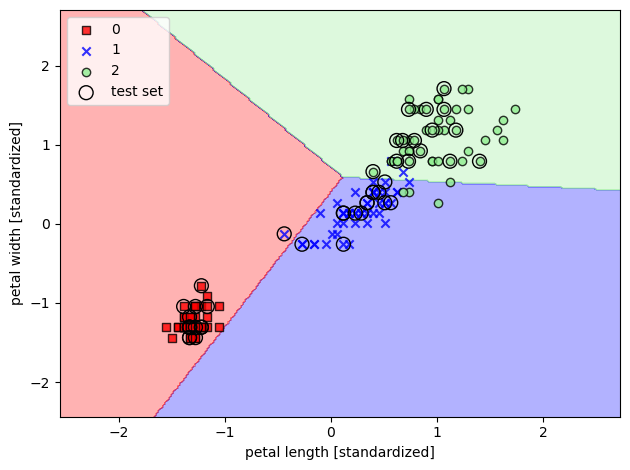

In [52]:
# 訓練データとテストデータの特徴量を行方向に結合
X_combined_std = np.vstack((X_train_std, X_test_std))
# 訓練データとテストデータのクラスラベルを結合
y_combined = np.hstack((y_train, y_test))
# 決定領域のプロット
plot_decision_regions(X=X_combined_std, 
                                        y=y_combined, 
                                        classifier=ppn, 
                                        test_idx=range(105,150))
# 軸のラベルの設定
plt.xlabel('petal length [standardized]')
plt.ylabel('petal width [standardized]')
# 凡例の設定
plt.legend(loc='upper left')
# グラフを表示
plt.tight_layout()
plt.show()

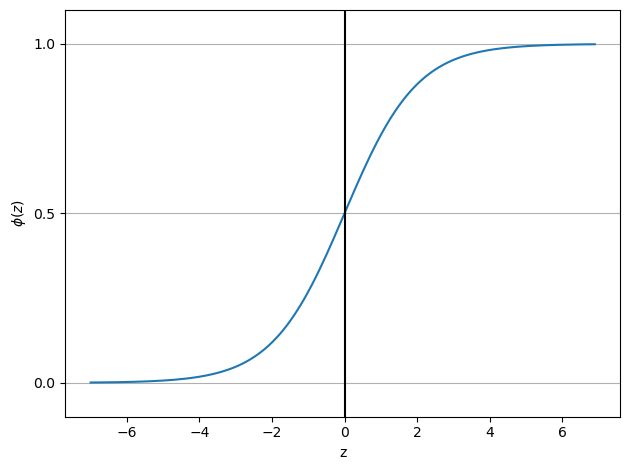

In [55]:
import matplotlib.pyplot as plt
import numpy as np
def sigmoid(z):
    return 1.0 / (1.0 + np.exp(-z))

# 0.1 間隔で-7 以上7 未満のデータを生成
z = np.arange(-7, 7, 0.1)
# 生成したデータでシグモイド関数を実行
phi_z = sigmoid(z)
# 元のデータとシグモイド関数の出力をプロット
plt.plot(z, phi_z)
# 垂直線を追加
plt.axvline(0.0, color='k')
# y軸の上限/下限を設定
plt.ylim(-0.1, 1.1)
# 軸のラベルを設定
plt.xlabel('z')
plt.ylabel('$\phi (z)$')
# y軸の目盛りを追加
plt.yticks([0.0, 0.5, 1.0])
# Axes クラスのオブジェクトの取得
ax = plt.gca()
# y軸の目盛りに合わせて水平グリッド線を追加
ax.yaxis.grid(True)
plt.tight_layout()
plt.show()

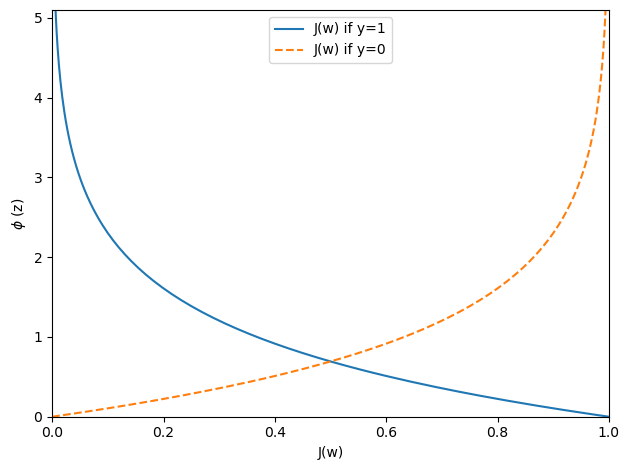

In [62]:
# y = 1 のコストを計算する関数
def cost_1(z):
    return -np.log(sigmoid(z))

# y = 0 のコストを計算する関数
def cost_0(z):
    return -np.log(1 - sigmoid(z))

# 0.1 間隔で -10以上10 未満のデータを生成
z = np.arange(-10, 10, 0.1)

phi_z = sigmoid(z)

# y = 1 のコストを計算する関数を実行
c1 = cost_1(z)
# 結果をプロット
plt.plot(phi_z, c1, label='J(w) if y=1')

# y = 0 のコストを計算する関数を実行
c0 = cost_0(z)
# 結果をプロット
plt.plot(phi_z, c0, linestyle='--', label='J(w) if y=0')

# グラフの諸設定
plt.xlim([0,1])
plt.ylim([0.0, 5.1])
plt.xlabel('J(w)')
plt.ylabel('$\phi$ (z)')
plt.legend(loc='upper center')
plt.tight_layout()
plt.show()

In [91]:
class LogisticRegressionGD(object):
    """勾配降下法に基づくロジスティック回帰分類器
    
    パラメータ
    ---------------
    eta : float
        学習率(0.0 <= eta < 1.0)
        
    n_iter: int
        訓練データの訓練回数
    
    random_state: int
        重みを初期化するための乱数シード
        
    属性
    ---------------
    w_: 1次元配列
        適合後の重み
    
    cost_: list
        各エポックでのロジスティックコスト関数
        
    """
    
    def __init__(self, eta=0.05, n_iter=100, random_state=1):
        self.eta = eta
        self.n_iter = n_iter
        self.random_state = random_state
        
    def fit(self, X, y):
        
        """訓練データに適合させる
        
        パラメータ
        ---------------
        X : {array-like structure}, shape = {n_examples, n_features}
            Training data
        y : array-like data structure, shape = {n_examples}
            Target data
            
        return
        ---------------
        self : object
        
        """
        
        rgen = np.random.RandomState(self.random_state)
        self.w_ = rgen.normal(loc=0.0, scale=0.01, size=1 + X.shape[1])
        self.cost_ = []
        
        # Train the training data for n_iter
        for i in range(self.n_iter):
            net_input = self.net_input(X)
            output = self.activation(net_input)
            errors = (y - output)
            self.w_[1:] += self.eta * X.T.dot(errors)
            self.w_[0]  += self.eta * errors.sum()
            
            # Note that it calculates the cost of the logistic regression and not of RSS
            cost = -y.dot(np.log(output)) - ((1-y).dot(np.log(1-output)))
            
            # Store the cost of each epoch
            self.cost_.append(cost)
    
        return self
    
        
    def net_input(self, X):
        return np.dot(X, self.w_[1:]) + self.w_[0]
    
    def activation(self, z):
        return 1. / (1. + np.exp(-np.clip(z, -250, 250)))
    
    def predict(self, X):
        """Return the class label after the 1 step"""
        return np.where(self.net_input(X) >= 0.0, 1, 0)
        # = np.where(self.activation(self.net_input(X)) >= 0.5, 1, 0)
    
    

/var/folders/f4/t879k8cn5kj8f8jx1_jvr7bc0000gn/T/ipykernel_52519/423227834.py:34: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=X[y==cl, 0],


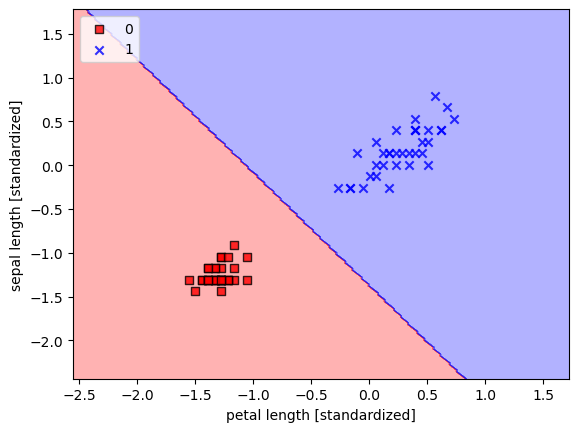

In [92]:
X_train_01_subset = X_train_std[(y_train == 0) | (y_train == 1)]
y_train_01_subset = y_train[(y_train==0) | (y_train==1)]

# Instance of the logistic regression
lrgd = LogisticRegressionGD(eta=0.05, n_iter=1000, random_state=1)

# Fit the model to the training data
lrgd.fit(X_train_01_subset, y_train_01_subset)

# Plot the decision region
plot_decision_regions(X=X_train_01_subset, y=y_train_01_subset, test_idx=False, classifier=lrgd)
plt.xlabel('petal length [standardized]')
plt.ylabel('sepal length [standardized]')
plt.legend(loc='upper left')
plt.show()


/var/folders/f4/t879k8cn5kj8f8jx1_jvr7bc0000gn/T/ipykernel_52519/423227834.py:34: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=X[y==cl, 0],


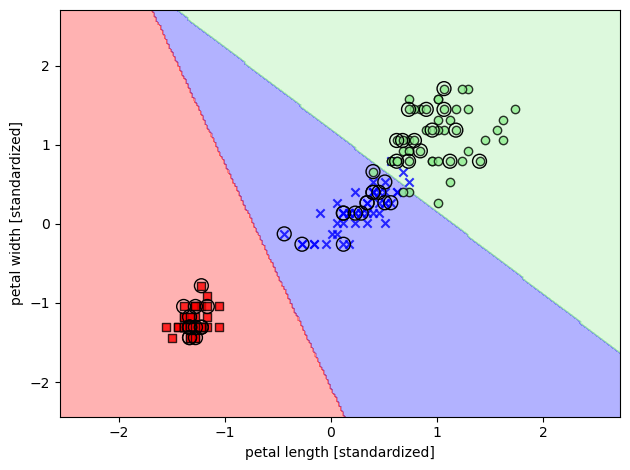

In [98]:
from sklearn.linear_model import LogisticRegression

lr  = LogisticRegression(C=100.0, random_state=1, solver='lbfgs', multi_class='ovr')

lr.fit(X_train_std, y_train)

plot_decision_regions(X_combined_std, 
                                        y_combined,
                                        classifier=lr,
                                        test_idx=range(105,150))

plt.xlabel('petal length [standardized]')
plt.ylabel('petal width [standardized]')
plt.tight_layout()
plt.show()

In [101]:
lr.predict_proba(X_test_std[:3, :])

array([[3.81527885e-09, 1.44792866e-01, 8.55207131e-01],
       [8.34020679e-01, 1.65979321e-01, 3.25737138e-13],
       [8.48831425e-01, 1.51168575e-01, 2.62277619e-14]])

In [105]:
lr.predict_proba(X_test_std[:3, :]).sum(axis=1)

array([1., 1., 1.])

In [106]:
lr.predict_proba(X_test_std[:3, :]).argmax(axis=1)

array([2, 0, 0])

In [108]:
X_test_std[:3, :]

array([[ 0.89820289,  1.44587881],
       [-1.16537974, -1.04507821],
       [-1.33269725, -1.17618121]])

In [109]:
lr.predict(X_test_std[0, :].reshape(1, -1))

array([2])

In [110]:
X_test_std[0, :]

array([0.89820289, 1.44587881])

In [111]:
X_test_std[0, :].reshape(1, -1)

array([[0.89820289, 1.44587881]])